In [15]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.stats as sm
from statsmodels.stats import proportion
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('C:/Users/Евгений/Desktop/Теория вероятности/HomeWork_AB_testing_8/ab_stats.csv', sep=',')
df.head(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814
5,0.0,0,0,A,9.578727
6,0.0,0,0,A,6.162601
7,0.0,0,0,A,11.909452
8,0.0,0,0,A,6.540910
9,0.0,0,0,A,7.990794


revenue - выручка num_purchases - кол-во покупок purchase - факт покупки ab_group - A/B группы av_site visit - кол-во визитов в среднем на пользователя

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [18]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [19]:
df['ab_group'].value_counts()

ab_group
A    11835
B    11817
Name: count, dtype: int64

Проверка на нормальность распределения и применение статистических критериев

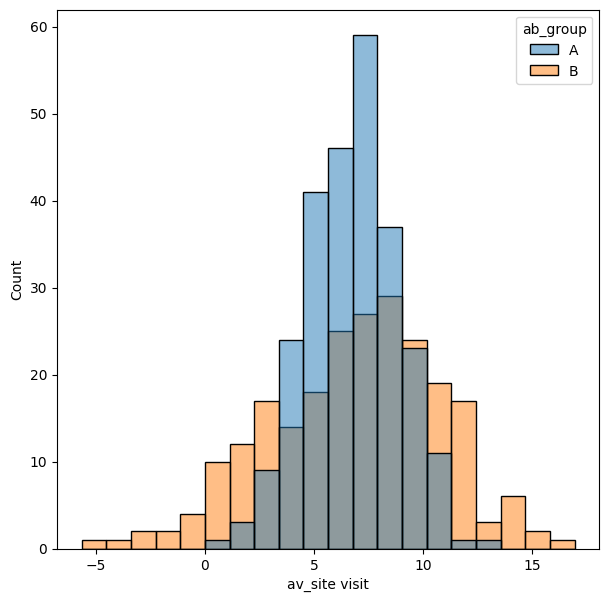

In [20]:
plt.figure(figsize=(7, 7))
sns.histplot(data=df[df['purchase']==1], x='av_site visit', bins=20, hue='ab_group');

In [21]:
#Данные распределены ненормально, поэтому нужно использовать непараметрический критерий Манна-Уитни.

stats.mannwhitneyu(x=df[(df['ab_group'] == 'A')]['revenue'].values,
                   y=df[(df['ab_group'] == 'B')]['revenue'].values)

MannwhitneyuResult(statistic=70054756.0, pvalue=0.3243889561742552)

Принимаем Нулевую гипотезу равенстве метрик ARPU в контрольной и тестовой группах.

In [22]:
# среднее количество покупок на пользователя
stats.mannwhitneyu(x=df[(df['ab_group'] == 'A')]['num_purchases'].values,
                   y=df[(df['ab_group'] == 'B')]['num_purchases'].values)

MannwhitneyuResult(statistic=70054599.0, pvalue=0.3249718497892071)

Статистичнески значимых различий между группами нет.

In [23]:
# ARPPU
stats.mannwhitneyu(x=df[(df['ab_group'] == 'A') & (df['purchase'] == 1)]['revenue'].values,
                   y=df[(df['ab_group'] == 'B') & (df['purchase'] == 1)]['revenue'].values)

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)

Статистически назнчимых различий нет

Выкатывать изменения с тестовой группы не целесообразно, т.к. результаты теста и контроля по основным метрикам не различаются и оснований отвергнуть нулевую гипотезу нет